## **1. Import Dataset**

**Трохи для контексту (загальні відомості про датасет)**

Автомобільна компанія планує вийти на нові ринки зі своїми продуктами (P1, P2, P3, P4 і P5). Після інтенсивного маркетингового дослідження вони дійшли висновку, що поведінка нового ринку схожа на поведінку існуючого ринку.

На існуючому ринку відділ продажів класифікував усіх клієнтів на 4 сегменти (A, B, C, D). Потім вони провели сегментовану інформаційно-пропагандистську роботу та комунікацію для різних сегментів клієнтів. Ця стратегія спрацювала для них надзвичайно добре. Вони планують використовувати цю ж стратегію на нових ринках, визначили потенційних клієнтів і хочуть автоматизувати процес сегментації. Таким чином завдання полягає у тому, щоби визначити найкращий класифікатор для поставленого завдання.

Дані:

**ID** Унікальний ID

**Gender** Гендер клієнта

**Ever_Married** Сімейний стан клієнта

**Age**	Вік клієнта

**Graduated** Чи випустився клієнт?

**Profession** Професія клієнта

**Work_Experience**	Досвід роботи у роках

**Spending_Score**	Оцінка рівня витрат клієнта

**Family_Size**	Кількість членів сім'ї клієнта (включаючи клієнта)

**Var_1** Анонімна категорія для клієнта

**Segmentation (target)** Customer Категорія клієнта відповідно до сегментації

In [517]:
#Завантажимо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [227]:
#Завантажимо дані, виведемо назви колонок
try:
    df = pd.read_csv('customer-segmentation-classification.csv')
    print('Датасет завантежно успішно')
except FileNotFoundError:
    print('Файл не знайдено. Будь ласка, перевірте, чи правильно ви завантажили дані')
except Exception as e:
    print(f'Виникла проблема: {e}')

Датасет завантежно успішно


In [229]:
#Завантажимо перші рядки датасету, щоби отримати перше уявлення про дані
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [231]:
#Встановлюємо розмір нашого датасету
print('Розмір датасету : ', df.shape)

Розмір датасету :  (8068, 11)


Датасет складається з 8068 спостережень (n) та 11 первинних ознак (p). 

## **2. Data Preprocessing**

In [235]:
#Розглянемо більш детальну статистику про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Можемо побачити, що є пропущенні значення у даних, а отже, ці пропуски треба буде в подальшому заповнити або видалити. Також можемо глянути тип даних для кожної категорії, враховуючи попередній контекст, можемо зробити висновок, що очевидних помилок у типі даних немає, тому можемо перейти до більш скурпульозного аналізу.

In [238]:
#Дослідимо наш датасет детальніше, переглянемо описову статистику для числових змінних
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


Загалом середні і максимальні значення Age, Work_Experience та Family_Size вказують на те, що очевидних помилок у даних немає. ID у подальшому аналізі можна дропнути (залишимо до моменту перевірки на дублікати). 

In [241]:
#Переглянемо описову статистику для категоріальних змінних
df.describe(include=['O'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


У категоріальних змінних також не спостерігається очевидних помилок (errors). Однак порівняно значна кількість категоріальних даних у цьому датасеті  вказує на важливість правильної їх обробки для подальшого їх використання у моделях машинного навчання.

З огляду на дані, можемо зробити такі висновки щодо подальшої обробки даних:
1. Gender, Ever_Married, Graduated - бінарні номінальні змінні, можемо використовувати Label Encoding або Binary Encoding
2. Profession - номінальна змінна з 9 унікальними значеннями, оскільки кількість унікальних значень все ж є помірною, то можемо надалі використовувати One-Hot Encoding, однак якщо якість моделі страждатиме від високої розмірності, або будуть ознаки перенавчання, то можемо використати Target Encoding
3. Spending_Score - ординальна змінна, будемо використовувати Ordinar Encoding (з урахуванням порядку категорій).
4. Var_1 - номінальна змінна з 7 унікальними значеннями, підхід як для Profession
5. Segmentation - категоріальна змінна з 4 унікальними значеннями, використаємо Label Encoding

Подальший підхід: більш уніфіковани вибір моделей кодування, я не вибиратиму всі можливі варіанти, а якомога більше спрощу код для кращого розуміння, однак перед цим необхідно заповнити пропуски у даних (якщо такі є).

Можемо прорахувати, як кодування відобразиться на розмірності датасета:
1. Gender, Ever_Married, Graduated: Label Encoding (1 ознака кожна)
2. Spending_Score: Ordinal Encoding (1 ознака)
3. Profession: One-Hot Encoding (з drop='first'), створить 8 ознак
4. Var_1: One-Hot Encoding (з drop='first'), створить 6 ознак

Загальна кількість ознак (p): 1+1+1+1+8+6+3(числові) = 21. Співвідношення n/p = 8068/21=384. Отже, це співвідношення є достатнім (дані не будуть роздрідженими) для того, щоб продовжувати подальший аналіз даних.

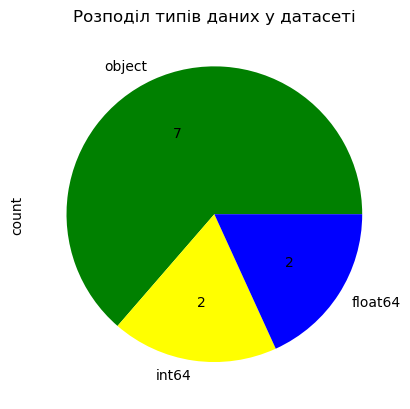

In [244]:
#Виведемо інформацію про типи даних у нашому датасеті у вигляді кругової діаграми
types_counts = df.dtypes.value_counts()
colors = ['#008000', '#FFFF00', '#0000FF']
plt.title('Розподіл типів даних у датасеті')
types_counts.plot.pie(autopct=lambda p: '{:.0f}'.format(p * sum(types_counts) / 100), colors=colors) 
plt.show()

На цій діаграмі можемо побачити візуальне співвідношення типів даних, яке ми бачили ще на самому початку аналізу.

In [247]:
#Перевіримо наявність дублікатів
duplicate_count = df.duplicated().sum()
print('Кількість дублікатів : ', duplicate_count)

Кількість дублікатів :  0


In [249]:
#Перейменуємо колонку Var_1 для кращого розуміння
df=df.rename(columns={"Var_1":"Category"})

In [251]:
#Виключимо колонку ID, бо вона не є значущою для задачі класифікації
df=df.drop(columns="ID")

In [253]:
#Розділимо колонки на числові та категоріальні
numeric_features = []
categorical_features = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numeric_features.append(column)
    elif df[column].dtype == 'object':
        categorical_features.append(column)

print("Numeric Features:", numeric_features)
print(140 * '-')
print("Categorical Features:", categorical_features)

Numeric Features: ['Age', 'Work_Experience', 'Family_Size']
--------------------------------------------------------------------------------------------------------------------------------------------
Categorical Features: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Category', 'Segmentation']


### Missing Data Detection and Imputation

In [256]:
#Перевіряємо, чи існують пропуски у даних (а з попереднього аналізу ми знаємо, що вони існують)
print(df.isnull().sum())

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Category            76
Segmentation         0
dtype: int64


In [258]:
#Перевіряємо, скільки пропуски становлять % у відношенні до даних
def count_missings(df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.concat([missing_values, missing_percentage], axis=1)
    missing_df.columns = ['Missing Count', 'Missing %']
    missing_df_sorted = missing_df[missing_df['Missing %'] > 0.01].sort_values(by='Missing %', ascending=False)
    
    return missing_df_sorted

In [260]:
count_missings(df)

,Missing Count,Missing %
Work_Experience,829,10.275161
Family_Size,335,4.152206
Ever_Married,140,1.735250
Profession,124,1.536936
Graduated,78,0.966782
Category,76,0.941993


З огляду на результати, можемо зробити висновок, що найбільша кількість даних відсутня у категорії **Work_Experience**, а також у категоріях **Family_Size** та **Ever_Marries**

Займемось заповненням пропусків або імпутацією. Для цього використаємо наступну стратегію:

1. Для категоріальних змінних використаємо найпоширеніше значення - моду (тут є ризик, що може виникнути дисбаланс, однак відсоток пропусків у категоріальних змінних невеликий, тому суттєвих проблем виникнути не повинно).
2. Числові змінні візуалізуємо, якщо розподіл буде нормальним, то заповнимо середніми значеннями, якщо зі значним зміщеннями, то медіанним, щоб уникнути значної асиметрії.

In [263]:
#Заповнюємо пропуски у категоріальних змінних
categorical_features = ['Ever_Married', 'Graduated', 'Profession', 'Category']

for feature in categorical_features:
    mode_value = df[feature].mode()[0]  # Отримуємо моду для кожної змінної
    df.loc[:, feature] = df[feature].fillna(mode_value)

In [265]:
#Перевіряємо, чи залишились пропуски у категоріальних змінних
print(df[categorical_features].isnull().sum())

Ever_Married    0
Graduated       0
Profession      0
Category        0
dtype: int64


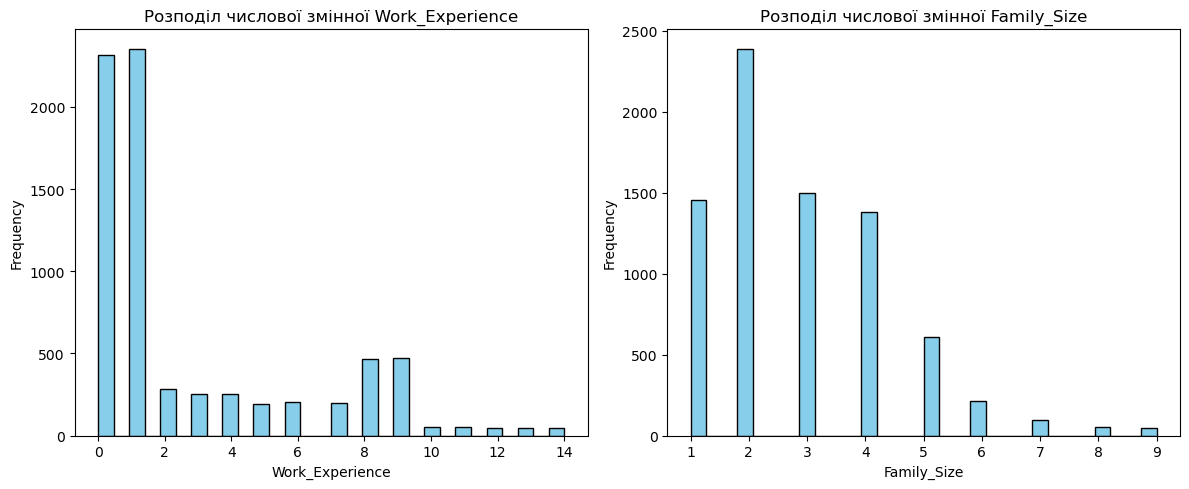

In [267]:
# Візуалізація розподілів числових ознак з пропусками
numeric_features_with_missing = ['Work_Experience', 'Family_Size']

plt.figure(figsize=(12, 5))
for i, feature in enumerate(numeric_features_with_missing, 1):
    plt.subplot(1, 2, i)
    df[feature].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Розподіл числової змінної {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Бачимо, що в обох випадках розподіли зміщенні вліво, тому пропуски краще заповнити медіанними значеннями.

In [270]:
# Заповнення пропусків у числових змінних
for feature in numeric_features_with_missing:
    median_value = df[feature].median()  # Обчислення медіанного значення
    df.loc[:, feature] = df[feature].fillna(median_value)

In [272]:
#Перевіряємо пропуски після маніпуляцій
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

Пропусків немає, отже, проблема успішно усунена.

### Outliers Analysis

In [276]:
# Перевіримо дані на викиди (метод IQR)
outliers_info = {}
for column in numeric_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Границі викидів
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Знаходимо викиди
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': len(outliers),
        'outliers_percentage': len(outliers) / len(df) * 100
    }

In [278]:
# Поглянемо на інформацію про викиди
outliers_info

{'Age': {'lower_bound': -4.5,
  'upper_bound': 87.5,
  'num_outliers': 71,
  'outliers_percentage': 0.8800198314328209},
 'Work_Experience': {'lower_bound': -6.0,
  'upper_bound': 10.0,
  'num_outliers': 189,
  'outliers_percentage': 2.342588001983143},
 'Family_Size': {'lower_bound': -1.0,
  'upper_bound': 7.0,
  'num_outliers': 94,
  'outliers_percentage': 1.1650966782350025}}

Загалом викиди становлять 1-2% у наших, однак такі класифікатори як SVM, kNN, AdaBoost можуть бути чутливими до таких значень, тому я пропоную замінити їх на межі IQR для кожної числової колонки. Загалом ці дані можна просто видалити, а можна використати більш робастні моделі, що менш чутливі для викидів (і менше зменшує варіацію даних).

In [281]:
# Обробка викидів шляхом заміни їх на межі IQR для кожної числової колонки

# Створення копії набору даних для обробки викидів
data_capped = df.copy()

# Заміна викидів на межові значення IQR
for column in numeric_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Замінюємо викиди на відповідні граничні значення
    data_capped[column] = data_capped[column].clip(lower=lower_bound, upper=upper_bound)

# Відображення перших кількох рядків модифікованого набору даних
data_capped.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,Male,No,22.0,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38.0,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67.0,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67.0,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40.0,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [283]:
# Збережемо оброблений файл з даними, де викиди були замінені на межі IQR
data_capped.to_csv('processed_data.csv', index=False)

print("Дані успішно збережені у файл 'processed_data.csv'.")

Дані успішно збережені у файл 'processed_data.csv'.


## **3. Data Vizualization**

### Target Value Exploration (Segmentation)

In [287]:
# Проаналізуємо статистичну інформацію
df['Segmentation'].describe()

count     8068
unique       4
top          D
freq      2268
Name: Segmentation, dtype: object

In [289]:
# Глянемо розподіл за класами
df['Segmentation'].value_counts()

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64

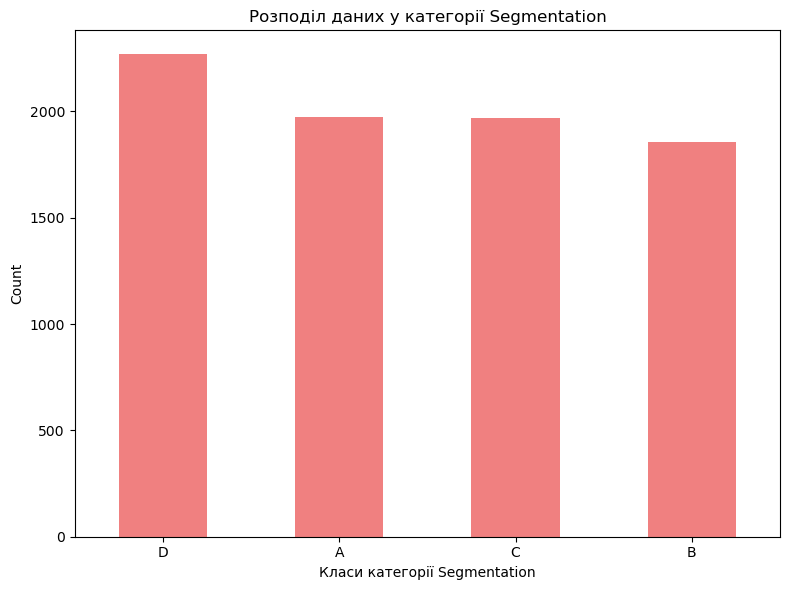

In [291]:
# Зобразимо стовпчикову діаграму для класів категорії Segmentation
plt.figure(figsize=(8, 6))
df['Segmentation'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Розподіл даних у категорії Segmentation')
plt.ylabel('Count')
plt.xlabel('Класи категорії Segmentation')
plt.xticks(rotation=0)
plt.tight_layout()

# Покажемо графік
plt.show()

Можемо зробити висновок про те, що датасет є доволі збалансованим. Однак клас D превалює, що може вказувати на те, що можливі викривлення в процесі класифікації.

<Figure size 2000x1500 with 0 Axes>

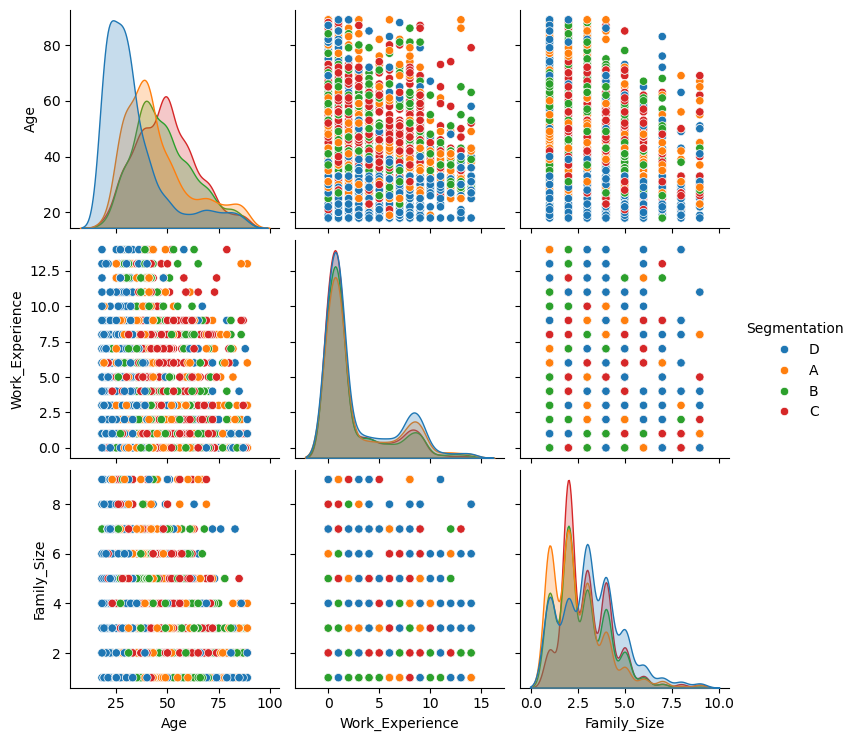

In [294]:
# Зобразимо pairplot для класів категорії Segmentation у порівнянні з чисельними змінними
plt.figure(figsize=(20,15))
sns.pairplot(df, hue='Segmentation')
plt.show()

На основі даних можемо зробити такі висновки:
1. Як правило, молодші люди та ті, хто має менше досвіду належать до категорії D
2. Категорії А і С мають схожі розподіли, що може вказувати на проблему з їх подальшою класифікацією (принаймні по числових показниках)

### General Visual Insights

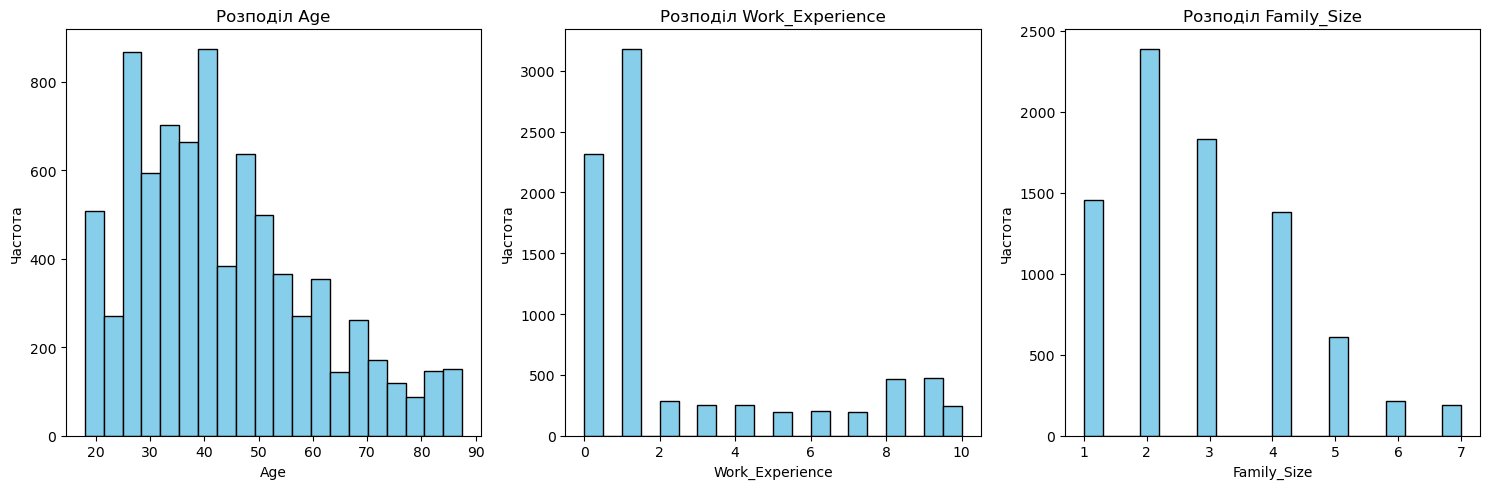

In [298]:
# Побудуємо гістограми для кожної з числових ознак
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    plt.hist(data_capped[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Розподіл {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Загальні висновки:
1. Дані вказують на те, що вибірка орієнтована на молодих людей із невеликим досвідом роботи та маленькими сім'ями (які складаються здебільшого з подружжя без дітей).
2. Такі особливості розподілу можуть бути корисними при виборі ознак для класифікації та для інтерпретації результатів моделі.


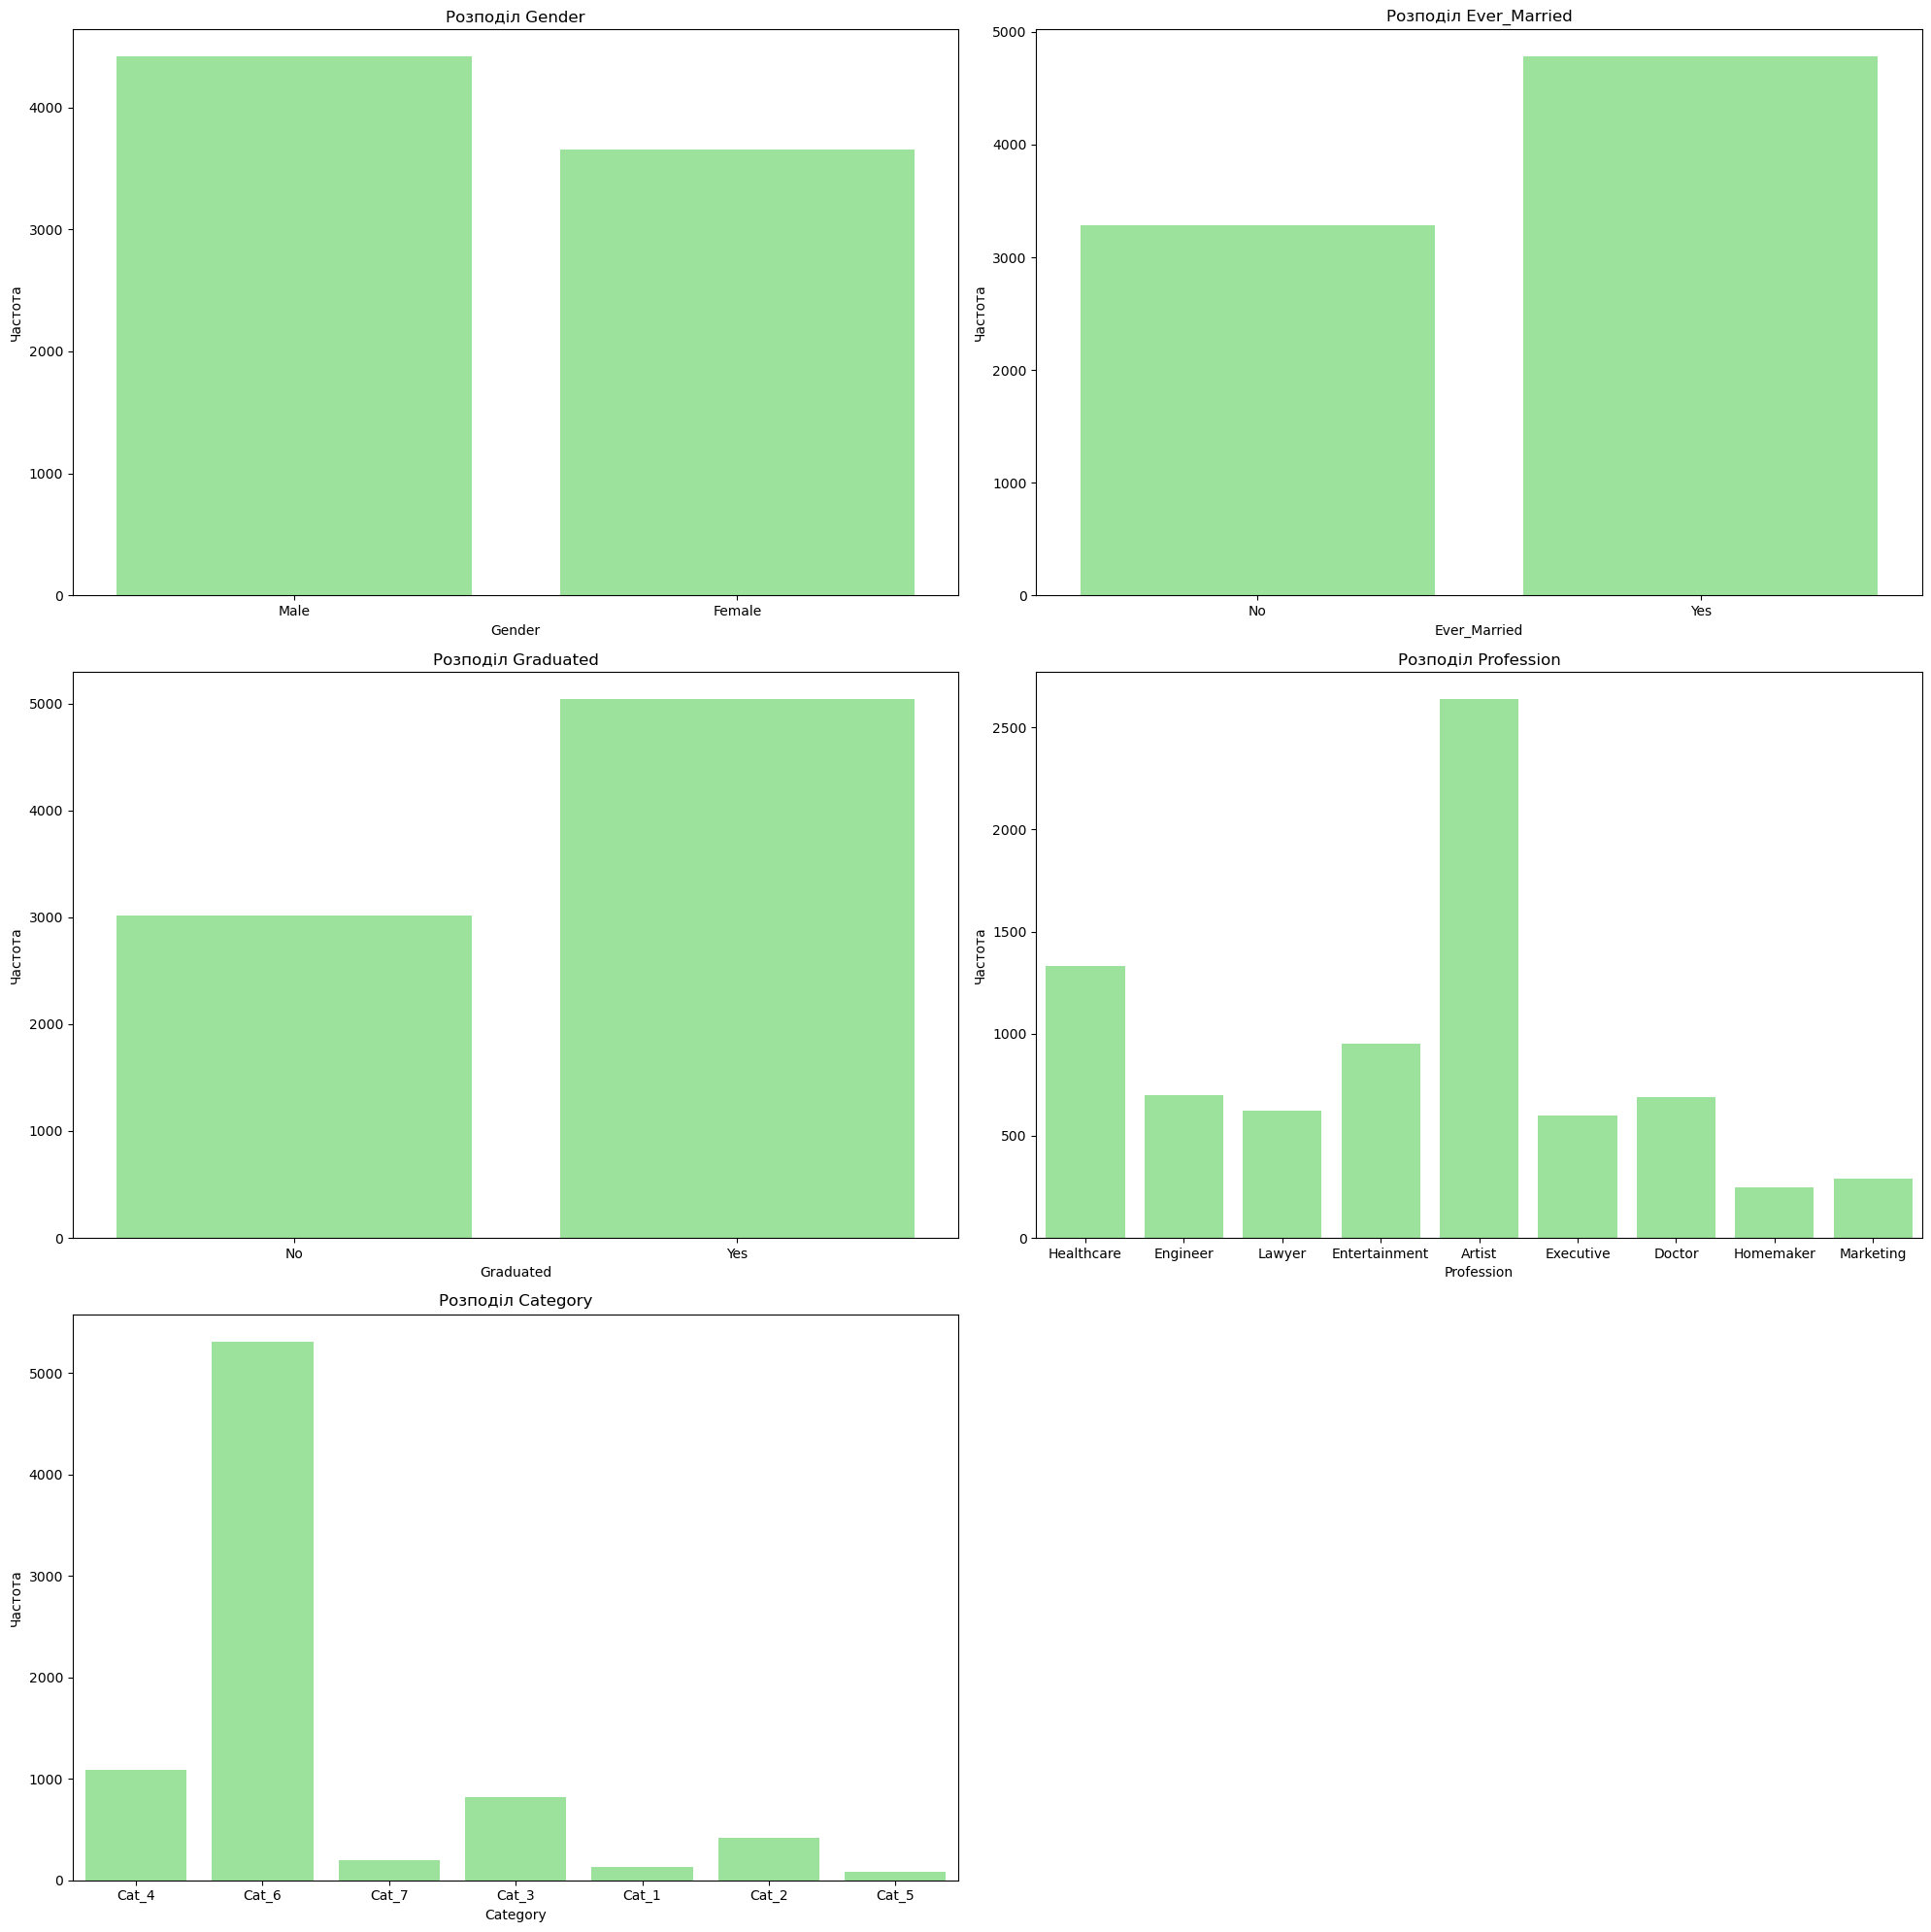

In [301]:
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Category']

# Побудуємо countplot для кожної категоріальної ознаки
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i) 
    sns.countplot(data=data_capped, x=column, color='lightgreen') 
    plt.title(f'Розподіл {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()  # Забезпечуємо коректне розташування графіків
plt.show()

Основні інсайти:
1. Чоловіки переважають над жінками.
2. Більшість клієнтів автомобільної фірми одружені.
3. Значно більше людей з вищою освітою.
4. Найбільша кількість людей працює у сфері мистецтва, найменше — в маркетингу.
5. Найпоширеніша категорія — низькі витрати (люди мало витрачають).

### Categorical Data Encoding

У розділі 2 Data Preprocessing було детально розглянуто те, як поетапно закодувати категоріальні змінні, у цьому розділі втілимо це у реальність.

#### Label Encoding

In [306]:
#Перетворюємо категорії Gender, Ever_Married та Graduated
data_capped['Gender'] = data_capped['Gender'].map({'Male': 0, 'Female': 1})
data_capped['Ever_Married'] = data_capped['Ever_Married'].map({'No': 0, 'Yes': 1})
data_capped['Graduated'] = data_capped['Graduated'].map({'No': 0, 'Yes': 1})

#### Ordinal Encoding

In [309]:
#Перетворюємо категорію Spending_Score
spending_mapping = {'Low': 0, 'Average': 1, 'High': 2}
data_capped['Spending_Score'] = data_capped['Spending_Score'].map(spending_mapping)

#### One-Hot Encoding

In [312]:
#Перетворюємо категорії Profession і Category
data_capped = pd.get_dummies(data_capped, columns=['Profession', 'Category'], drop_first=True, dtype=int)

#### Label Encoding for Target Value

In [315]:
#Перетворюємо цільову змінну Segmentation
segmentation_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
data_capped['Segmentation'] = data_capped['Segmentation'].map(segmentation_mapping)

In [317]:
# Збережемо оброблений файл з категоріальними даними після обробки
data_capped.to_csv('processed_data_encoding.csv', index=False)

print("Дані успішно збережені у файл 'processed_data_encoding.csv'.")

Дані успішно збережені у файл 'processed_data_encoding.csv'.


### Heatmap, histograms, boxplots

#### Heatmap 

In [321]:
# Рахуємо кореляційну матрицю
correlation_matrix = data_capped.corr()

# Segmentation (як цільова) повинна бути в кінці
columns = [col for col in correlation_matrix.columns if col != 'Segmentation'] + ['Segmentation']
correlation_matrix = correlation_matrix.loc[columns, columns]

<Axes: >

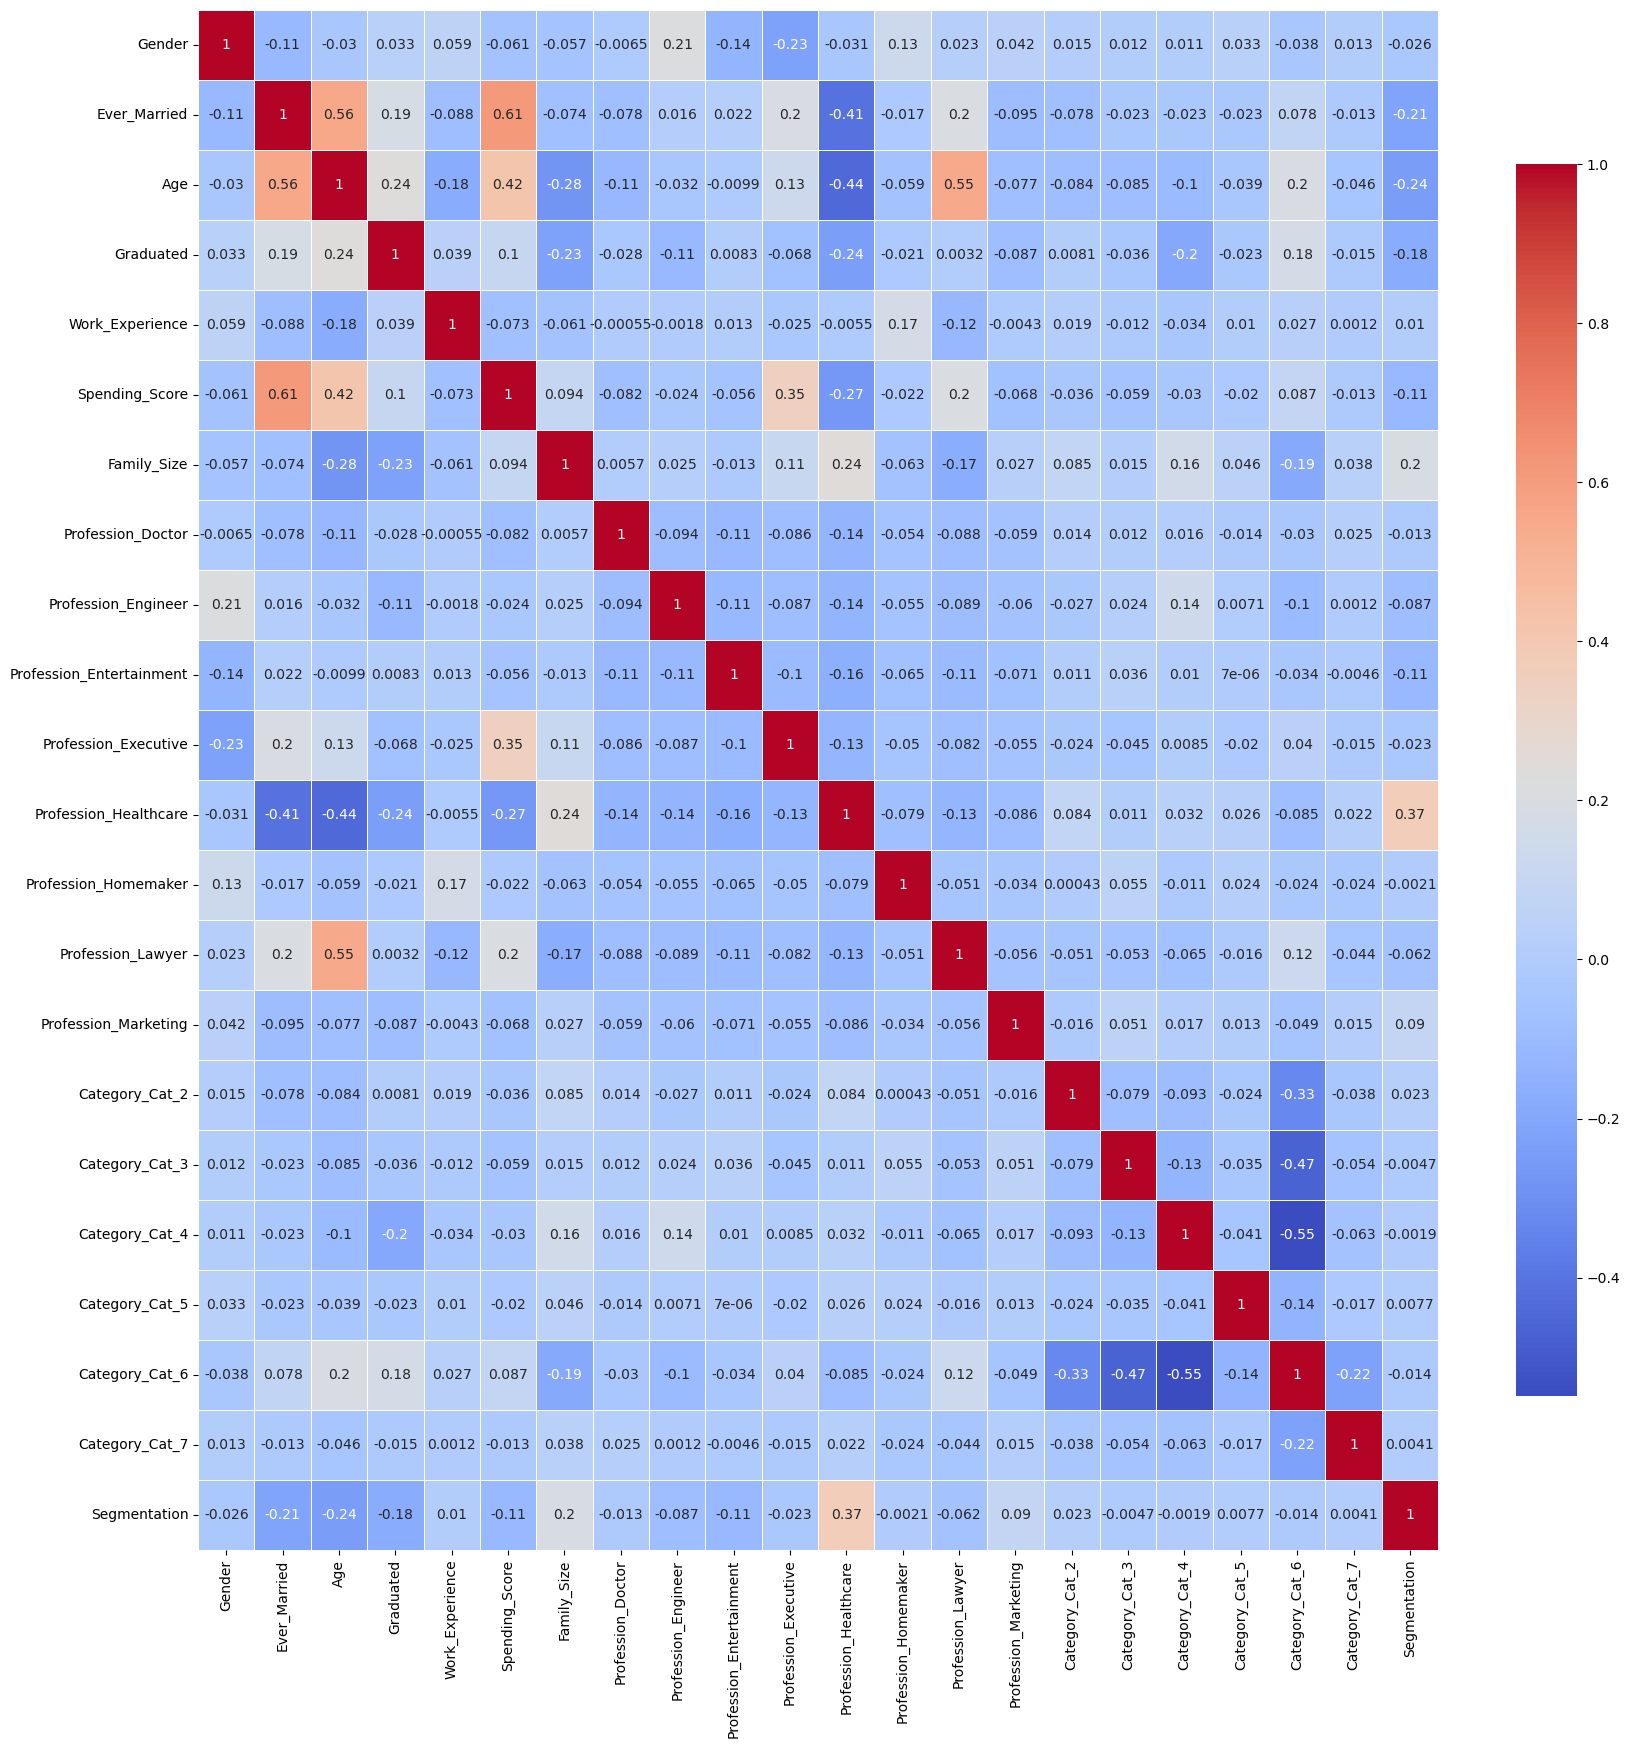

In [323]:
# Побудова heatmap з виділенням цільової змінної
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': .8})

Декілька висновків:
1. Найбільш значущими для сегментації є такі змінні, як Profession_Healthcare та Family_Size.
2. Сильних кореляцій з незалежною змінною (>0.5 або <-0.5) немає, що свідчить про те, що жодна з ознак не є домінуючою у визначенні сегментації. Це також може вказувати на наявність більш складних, ніж лінійна залежність між змінними.
3. У матриці присутня значна кореляція ознак між змінними, що може свідчити про наявність проблеми колінеарності. Ми б мали провести аналіз мультиколінеарності, однак це має сенс здебільшого для моделей, що класифікуються за допомогою встановлення саме лінійних зв'язків. Однак класифікатори, що використовуються у нашій роботі здебільшого стійкі до цієї проблеми. Єдине зауважу, що загалом видалення або об'єднання корельованих ознак може покращити продуктивність і стабільність моделей (особливо коли йдеться про високовимірні дані).
4. Також іноді для визначення взаємовпливів між категоріальними змінними використовують коефіцієнт Cramer's V, а не Пірсона. Однак для економлення часу я цього не робитиму.

#### Histograms

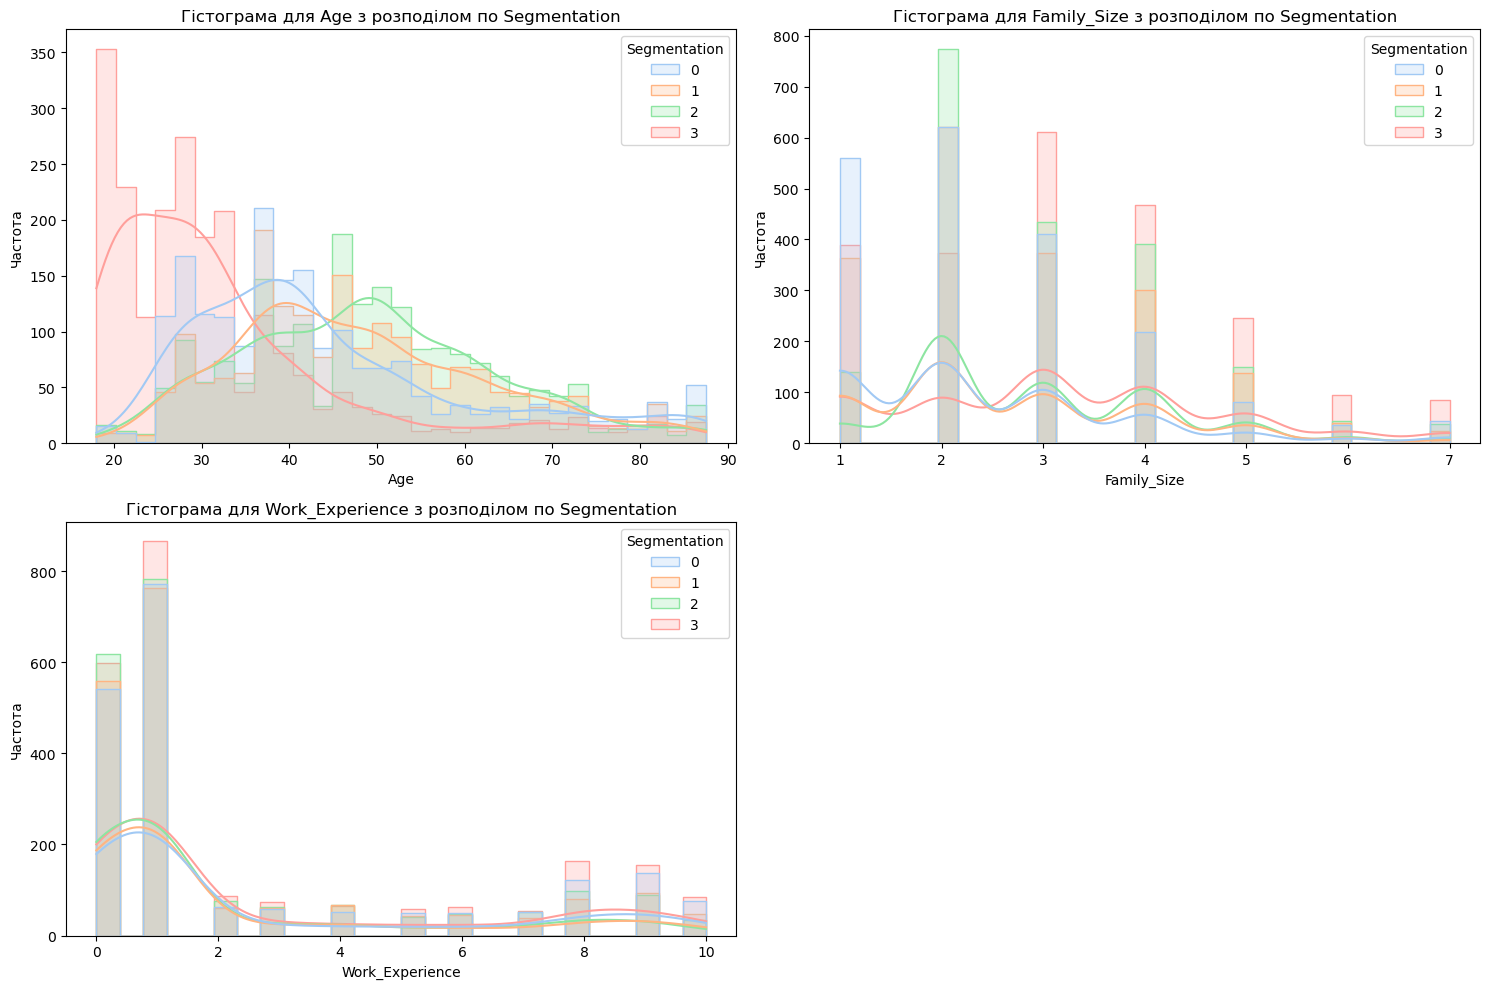

In [327]:
# Список числових ознак
numerical_features = ['Age', 'Family_Size', 'Work_Experience']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data_capped, x=column, hue='Segmentation', kde=True, palette='pastel', element='step')
    plt.title(f'Гістограма для {column} з розподілом по Segmentation')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

З огляду на побудовані гістограми можемо зробити такі висновки:
1. Для категорії віку покупців: молоді покупці (20–30 років) частіше належать до сегментів 0 і 1 (A i B до енкодінгу). Це може означати, що вони шукають автомобілі, які відповідають активному стилю життя або є більш доступними за ціною. Натомість сегмент 3 охоплює старших покупців, які, можливо, віддають перевагу більш комфортним автомобілям або преміум-класу.

2. Розмір сім'ї: можемо припустити (створити гіпотезу), що покупці з більшою кількістю членів сім'ї можуть частіше обирати автомобілі з більшим салоном або додатковими місцями (автомобілям C сегменту), а одинаки можуть віддавати перевагу компактним моделям.

3. Робочий досвід: покупці з невеликим робочим досвідом (молоді спеціалісти) можуть мати менший бюджет на покупку автомобіля, тому частіше обиратимуть доступніші моделі. Ті, хто має більше досвіду роботи, можуть бути готові інвестувати в дорожчі автомобілі з кращими характеристиками або додатковими функціями.

#### Boxplots

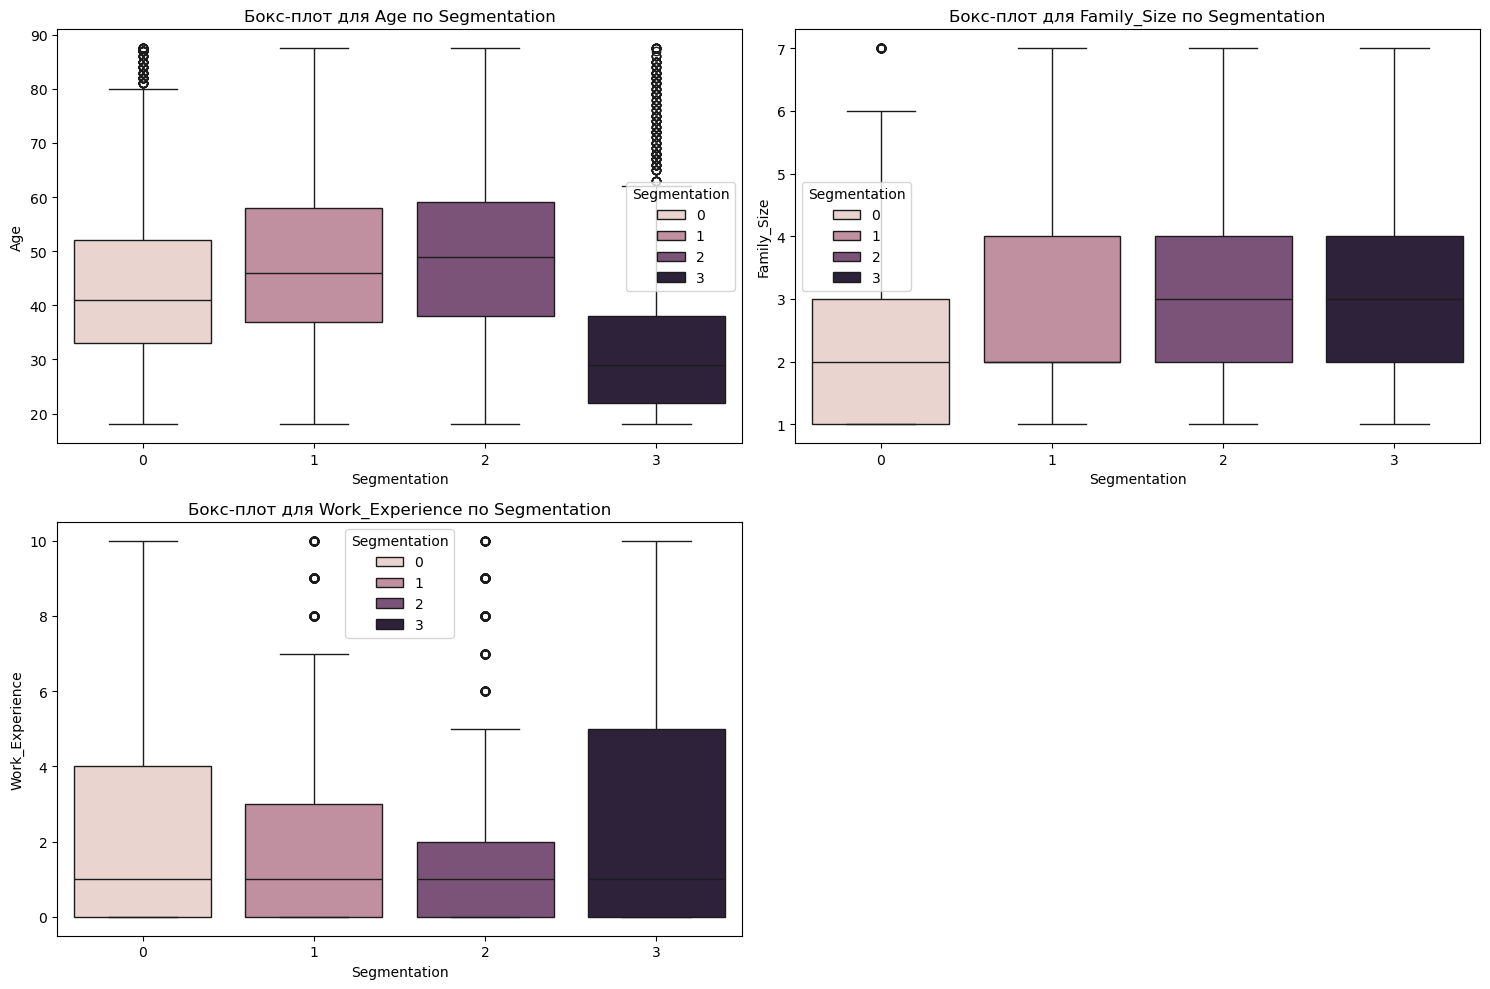

In [331]:
#Зобразимо боксплоти для числових ознак
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data_capped, x='Segmentation', y=column, hue='Segmentation')
    plt.title(f'Бокс-плот для {column} по Segmentation')
    plt.xlabel('Segmentation')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Боксплоти показують, що сегментація покупців автомобілів за віком має певні відмінності. Сегмент 3 включає молодших покупців із більш компактним віковим діапазоном, тоді як сегменти 0, 1 і 2 мають схожий розподіл, але з більшою кількістю вибросів. Це свідчить про ширший віковий діапазон серед цих груп.

Розмір сім'ї в основному стабільний між сегментами, але сегмент 3 показує більшу варіативність, що може вказувати на наявність покупців із більшими сім'ями. Сегмент 0 має більш вузький діапазон, що свідчить про меншу ймовірність наявності великих сімей.

Досвід роботи також відрізняється: сегмент 3 має найширший діапазон і вищу медіану, що може означати більший стаж і фінансову спроможність. Сегменти 0, 1 і 2 демонструють менш виражену різницю в досвіді, зокрема, сегмент 0 має найменший діапазон, що може вказувати на молодших працівників із меншою кількістю років досвіду.

## **4. Data Scaling**

Для того, щоб перейти до аналізу роботи різних класифікаторів на нашому наборі даних, потрібно врахувати те, що класифікатори kNN та SVM чутливі до масштабування даних, тому завчасно нормалізуємо чисельні змінні.

In [335]:
from sklearn.preprocessing import MinMaxScaler

# Визначимо числові змінні для нормалізації
numerical_features = ['Age', 'Family_Size', 'Work_Experience']

# Ініціалізуємо MinMaxScaler
scaler = MinMaxScaler()

# Застосуємо MinMaxScaler до числових змінних
data_capped[numerical_features] = scaler.fit_transform(data_capped[numerical_features])

# Перевіримо результати нормалізації
data_capped[numerical_features].describe()

,Age,Family_Size,Work_Experience
count,8068.000000,8068.000000,8068.000000
mean,0.366303,0.306540,0.241547
std,0.240115,0.240292,0.310195
min,0.000000,0.000000,0.000000
25%,0.172662,0.166667,0.000000
50%,0.316547,0.333333,0.100000
75%,0.503597,0.500000,0.400000
max,1.000000,1.000000,1.000000


In [339]:
# Збережемо оброблений файл з чисельними змінними після нормалізації
data_capped.to_csv('processed_data_encoding.csv', index=False)

print("Дані успішно збережені у файл 'processed_data_encoding.csv'.")

Дані успішно збережені у файл 'processed_data_encoding.csv'.


## **5. Predictive Modelling**

In [466]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree

In [355]:
#Виділяємо залежні та незалажну змінні
X = data_capped
y = data_capped['Segmentation'].values

# Видаляємо цільову змінну 'Segmentation' із ознак
X = data_capped.drop(columns=['Segmentation'])
y = data_capped['Segmentation'].values

In [357]:
# Розділяємо дані на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [478]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', plot_cm=True):
    """Відображення матриці плутанини."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show() 
    
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, plot_cm=True):
    """Навчання моделі, оцінка і візуалізація результатів."""
    # Навчання моделі
    model.fit(X_train, y_train)

    # Передбачення на тестових даних
    y_pred = model.predict(X_test)

    # Оцінка моделі
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} accuracy score: {accuracy:.3f}")
    report = classification_report(y_test, y_pred)
    print(report)

    # Побудова матриці плутанини
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {model_name}')

    return model, y_pred

## Decision Tree

Decision Tree accuracy score: 0.498
              precision    recall  f1-score   support

           0       0.39      0.47      0.43       394
           1       0.43      0.17      0.24       372
           2       0.54      0.58      0.56       394
           3       0.58      0.72      0.64       454

    accuracy                           0.50      1614
   macro avg       0.48      0.48      0.47      1614
weighted avg       0.49      0.50      0.48      1614



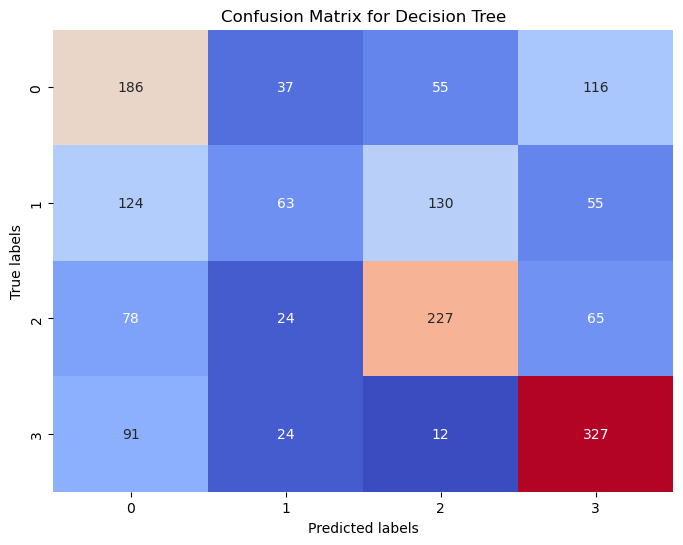

(DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
 array([1, 3, 0, ..., 0, 0, 2]))

In [481]:
# Налаштовуємо параметри
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
train_and_evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree') 

**Інтерпретація**:
1. Модель має проблеми з розрізненням класів 0 і 1, що можна бачити як у звіті про класифікацію, так і в матриці плутанини.
2. Клас 3 краще розпізнається моделлю порівняно з іншими, але існує певна плутанина з класом 0.
3. Для покращення моделі можна збільшити глибину дерева або використати інші методи налаштування параметрів.

## Random Forest

Random Forest accuracy score: 0.513
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       394
           1       0.43      0.15      0.22       372
           2       0.50      0.63      0.56       394
           3       0.62      0.76      0.68       454

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.47      1614
weighted avg       0.50      0.51      0.49      1614



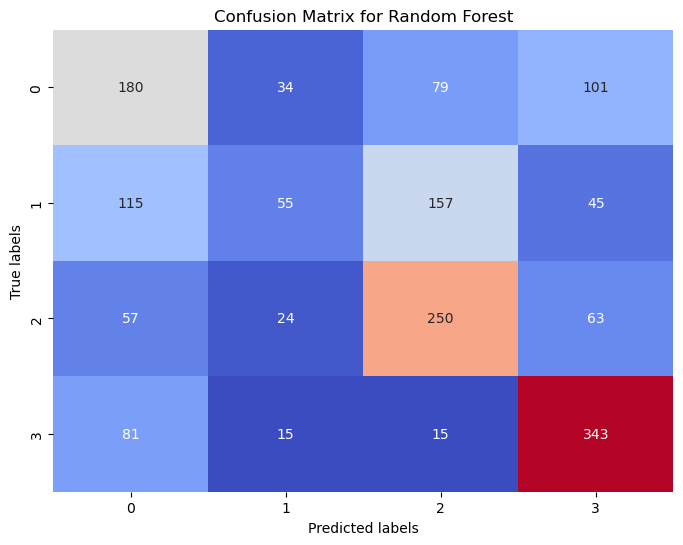

(RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42),
 array([0, 3, 0, ..., 2, 0, 2]))

In [485]:
#Налаштовуємо параметри
rf_model = RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)
train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')

**Інтерпретація**:
1. Модель Random Forest показує деяке покращення в класифікації порівняно з деревом рішень, особливо для класів 2 і 3.
2. Серйозні проблеми залишаються для класифікації класу 1, що свідчить про необхідність подальшого налаштування моделі або додаткових методів обробки даних.
3. Для подальшого поліпшення точності можна збільшити "глибину лісу" або "кількість дерев у лісі", а також використати інші стратегії для балансування класів.

## AdaBoost

AdaBoost accuracy score: 0.495
              precision    recall  f1-score   support

           0       0.43      0.44      0.43       394
           1       0.37      0.30      0.33       372
           2       0.45      0.44      0.45       394
           3       0.65      0.75      0.70       454

    accuracy                           0.50      1614
   macro avg       0.48      0.48      0.48      1614
weighted avg       0.48      0.50      0.49      1614



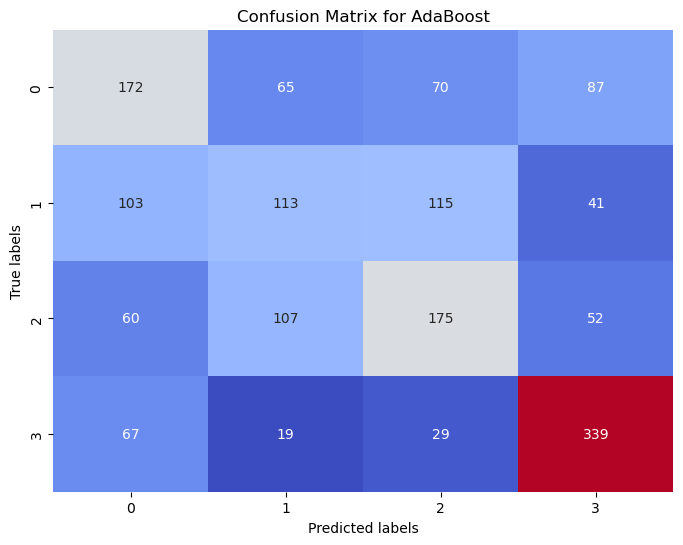

(AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42),
 array([0, 3, 0, ..., 1, 0, 2]))

In [502]:
#Налаштовуємо параметри
ada_model = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
train_and_evaluate_model(ada_model, X_train, X_test, y_train, y_test, 'AdaBoost')

**Інтерпретація**:
1. Модель AdaBoost має загальну точність 0.495, що свідчить про те, шо в цій конфігурації модель перформить гірше, ніж дві попередні. Метрики F1-міри для класів варіюються від 0.33 до 0.71, причому найкращі показники спостерігаються для класу 3, а найгірші для класу 1.

2. Матриця плутанини демонструє, що модель здатна досить точно класифікувати клас 3 (339 правильних передбачень), але має труднощі з іншими класами, особливо класом 1, де лише 113 передбачень були правильними, а більша частина була віднесена до інших класів. Це вказує на дисбаланс в успішності передбачень для різних класів (як і в інших методах)

3. Додатково було замінено алгоритм SAMME.R на SAMME через те, що SAMME.R є застарілим і буде вилучений у майбутніх версіях бібліотеки. Використання SAMME призвело до погіршення точності моделі, оскільки SAMME.R використовує вагові коефіцієнти які оновлюються на основі ймовірностей передбачення, що забезпечує більш плавну адаптацію моделі. Також для покращення моделі можна змінювати n_estimators (при збільшенні до 400 точність моделі збільшується до 0.527) або інші гіперпараметри.

## SVM

SVM accuracy score: 0.525
              precision    recall  f1-score   support

           0       0.41      0.51      0.45       394
           1       0.42      0.30      0.35       372
           2       0.55      0.55      0.55       394
           3       0.69      0.70      0.70       454

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.51      1614
weighted avg       0.52      0.53      0.52      1614



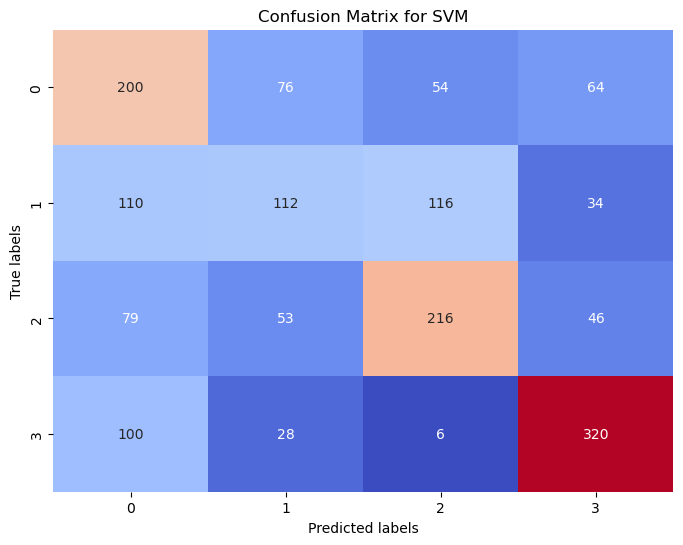

(SVC(C=1, gamma=0.1, random_state=42), array([0, 3, 0, ..., 1, 0, 2]))

In [493]:
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42)
train_and_evaluate_model(svm_model, X_train, X_test, y_train, y_test, 'SVM')

SVM with GridSearchCV accuracy score: 0.524
              precision    recall  f1-score   support

           0       0.41      0.45      0.43       394
           1       0.42      0.28      0.34       372
           2       0.56      0.58      0.57       394
           3       0.65      0.74      0.69       454

    accuracy                           0.52      1614
   macro avg       0.51      0.51      0.51      1614
weighted avg       0.51      0.52      0.51      1614



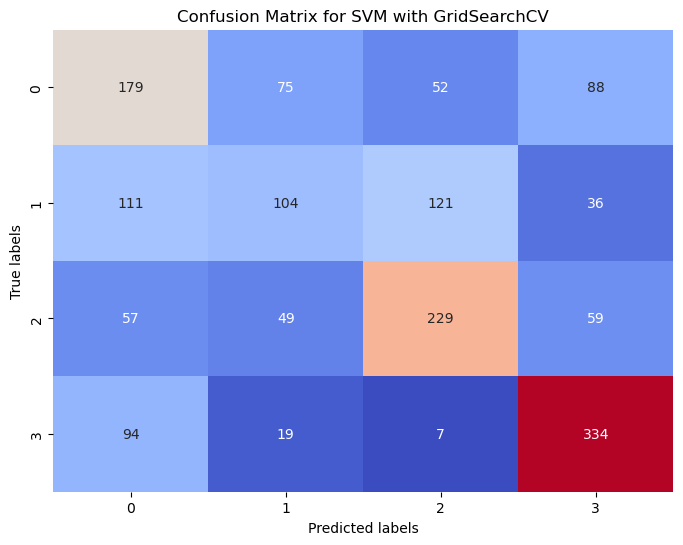

Найкращі параметри для SVM: {'C': 10, 'gamma': 0.1}


In [499]:
# Налаштуємо гіперпараметри
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Створюємо модель GridSearchCV для SVM
grid_svm = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Найкраща модель SVM
best_svm = grid_svm.best_estimator_

# Оцінка моделі з найкращими параметрами
model_name = 'SVM with GridSearchCV'
svm_model, svm_y_pred = train_and_evaluate_model(best_svm, X_train, X_test, y_train, y_test, model_name, plot_cm=True)

# Вивести найкращі параметри, знайдені GridSearchCV
print(f"Найкращі параметри для SVM: {grid_svm.best_params_}")

**Інтерпретація і Порівняння**:
1. Модель SVM має загальну точність 0.524 (з GridSearchCV) і 0.525 без покращення, що свідчить про середній рівень класифікації і найвищий з-поміж усіх розглянутих методів.

2. Найкращими параметрами для SVM є С=10 і gamma = 0.1. Оптимізація параметрів незначно покращила розпізнавання класу 2, але точність всієї моделі залишилася майже такою ж. Це вказує на те, що для покращення результатів можливо потрібно змінити інші параметри або спробувати інший метод оптимізації.

3. Загалом, результати показують, що модель SVM має труднощі з розпізнаванням певних класів, особливо класу 1, незалежно від налаштування параметрів.

## kNN

kNN accuracy score: 0.478
              precision    recall  f1-score   support

           0       0.37      0.45      0.41       394
           1       0.34      0.33      0.33       372
           2       0.56      0.51      0.53       394
           3       0.65      0.60      0.62       454

    accuracy                           0.48      1614
   macro avg       0.48      0.47      0.47      1614
weighted avg       0.49      0.48      0.48      1614



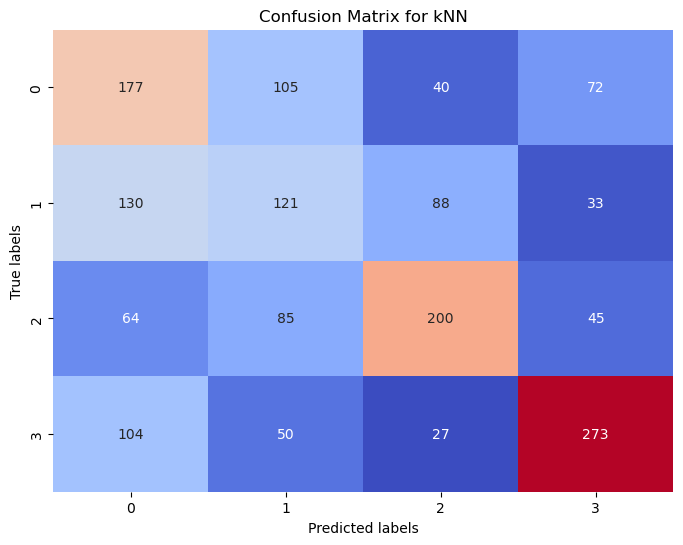

(KNeighborsClassifier(), array([0, 3, 1, ..., 1, 0, 2]))

In [509]:
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test, 'kNN')

kNN with GridSearchCV accuracy score: 0.507
              precision    recall  f1-score   support

           0       0.41      0.45      0.43       394
           1       0.38      0.31      0.34       372
           2       0.54      0.56      0.55       394
           3       0.64      0.68      0.66       454

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.50      0.51      0.50      1614



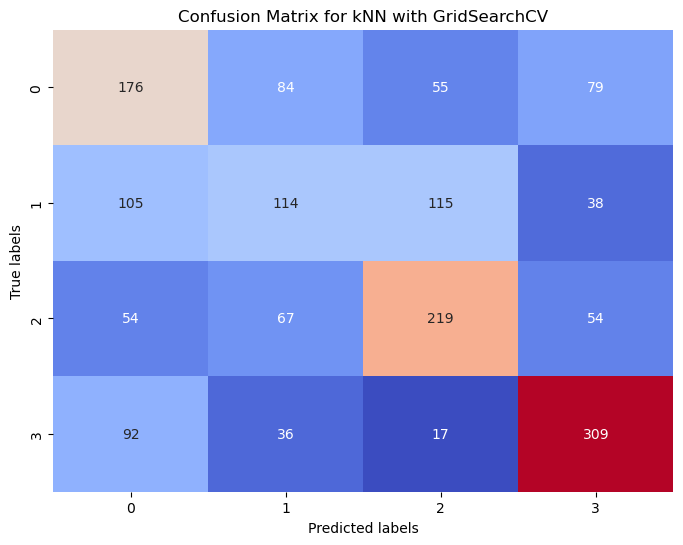

Найкращий параметр для kNN: KNeighborsClassifier(n_neighbors=15)


In [519]:
# Налаштуємо гіперпараметри
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Створюємо модель GridSearchCV для kNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Найкраща модель kNN
best_knn = grid_knn.best_estimator_

# Оцінка моделі з найкращими параметрами
model_name = 'kNN with GridSearchCV'
knn_model, knn_y_pred = train_and_evaluate_model(best_knn, X_train, X_test, y_train, y_test, model_name, plot_cm=True)

# Вивести найкращі параметри, знайдені GridSearchCV
print(f"Найкращий параметр для kNN: {grid_knn.best_estimator_}")

**Інтерпретація і Порівняння**:

1. Точність моделі з використанням GridSearchCV суттєво покращилась (на 2.9%), але все одно залишається гіршою, ніж в інших методах, розглянутих вище.

3. Найкращими параметрами для kNN є значення n_neighbors=15. Бачимо покращену класифікацію для класів 2 і 3, як видно з підвищеного значення recall і f1-score. Це свідчить про те, що оптимізація параметрів за допомогою GridSearchCV дозволила краще підібрати кількість сусідів.

4. Загалом, результати показують, що модель SVM має труднощі з розпізнаванням певних класів, особливо класу 1, незалежно від налаштування параметрів.

## **6. Results**

In [534]:
# Дані про точність (accuracy) різних моделей
results = {
    'Model': [
        'Decision Tree', 
        'Random Forest', 
        'AdaBoost', 
        'SVM', 
        'SVM with GridSearchCV', 
        'KNN', 
        'KNN with GridSearchCV'
    ],
    'Accuracy': [
        0.498, 
        0.513, 
        0.495, 
        0.525, 
        0.524, 
        0.478, 
        0.507
    ]
}

# Створюємо DataFrame
df_results = pd.DataFrame(results)

# Сортуємо за стовпцем 'Accuracy' у спадаючому порядку
df_results_sorted = pd.DataFrame(df_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True))
df_results_sorted

,Model,Accuracy
0,SVM,0.525
1,SVM with GridSearchCV,0.524
2,Random Forest,0.513
3,KNN with GridSearchCV,0.507
4,Decision Tree,0.498
5,AdaBoost,0.495
6,KNN,0.478


**Висновок**

1. Найбільш точною для цього завдання виявилась модель SVM і SVM with GridSearchVC з класифікаційною точністю 52.5%.
2. Суттєве покращення точності у порівнянні KNN with GridSearchCV з kNN свідчить про важливість гіперпараметричної оптимізації.
3. Загалом моделі показують точність на рівні 50-53%, що свідчить про необхідність подальшого аналізу з метою покращення результатів. Зокрема, можна покращити попередню обробку даних, наприклад, розширити набір даних або балансувати класи. Можна також додатково налаштовувати параметри наявних моделей, наприклад, глибину дерев і тд в методах Decision Tree, Random Forest і AdaBoost. Також можна спробувати ансамблеві методи, які комбінуватимуть результати кількох моделей. Крім того, можна застосувати метод PCA, що ми і спробуємо зробити у лабораторній роботі №2.